In [1]:
import sys

In [2]:
BASE_DIR = "../.."
DATA_DIR = f"{BASE_DIR}/data"
NBDATA_DIR = f"{BASE_DIR}/nbdata"
FIG_DIR = f"{BASE_DIR}/figs"

In [3]:
sys.path.append(BASE_DIR)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [5]:
import anndata as ad
import scanpy as sc

## Import DEG Analysis

In [6]:
deg_raw = pd.read_csv(f"{NBDATA_DIR}/iMN_deseq2_condition.tsv",sep="\t")

In [8]:
name_map = pd.read_csv(f"{NBDATA_DIR}/iPSC_ENSG_HGNC_mapping.tsv",sep="\t").set_index('ENSG')

In [9]:
deg_df = pd.merge(deg_raw,name_map,left_index=True,right_index=True,how='left')\
    .reset_index()\
    .set_index('HGNC')

In [10]:
deg_df['-log10(p adj)'] = -np.log10(deg_df['padj'])

In [11]:
deg_df = deg_df.rename(
    {
        'index':'ESNG',
        'log2FoldChange':'log2(fold change)'
    }
    ,axis=1)

In [12]:
deg_df

,ESNG,baseMean,log2(fold change),lfcSE,stat,pvalue,padj,-log10(p adj)
HGNC,,,,,,,,
NaN,ERCC-00136,4449.106698,-1.967622,0.146315,-13.447824,3.170675e-41,8.644211e-37,36.063275
NaN,ERCC-00131,257.899285,-2.011530,0.153220,-13.128352,2.265343e-39,3.088003e-35,34.510322
ENSG00000234710,ENSG00000234710,11.927402,-21.298318,1.661549,-12.818352,1.294219e-37,1.176143e-33,32.929540
NaN,ERCC-00130,74444.188601,-1.971408,0.157895,-12.485594,8.947278e-36,6.098241e-32,31.214795
NaN,ERCC-00095,294.781535,-2.101404,0.170735,-12.307990,8.204139e-35,4.473389e-31,30.349363
...,...,...,...,...,...,...,...,...
ENSG00000250253,ENSG00000250253,0.461977,0.000000,3.654444,0.000000,1.000000e+00,NaN,NaN
ENSG00000251918,ENSG00000251918,0.415901,0.000000,3.654444,0.000000,1.000000e+00,NaN,NaN
MIR487B,ENSG00000207754,0.622526,0.000000,3.654444,0.000000,1.000000e+00,NaN,NaN


## Visualize Top Genes by Pvalue

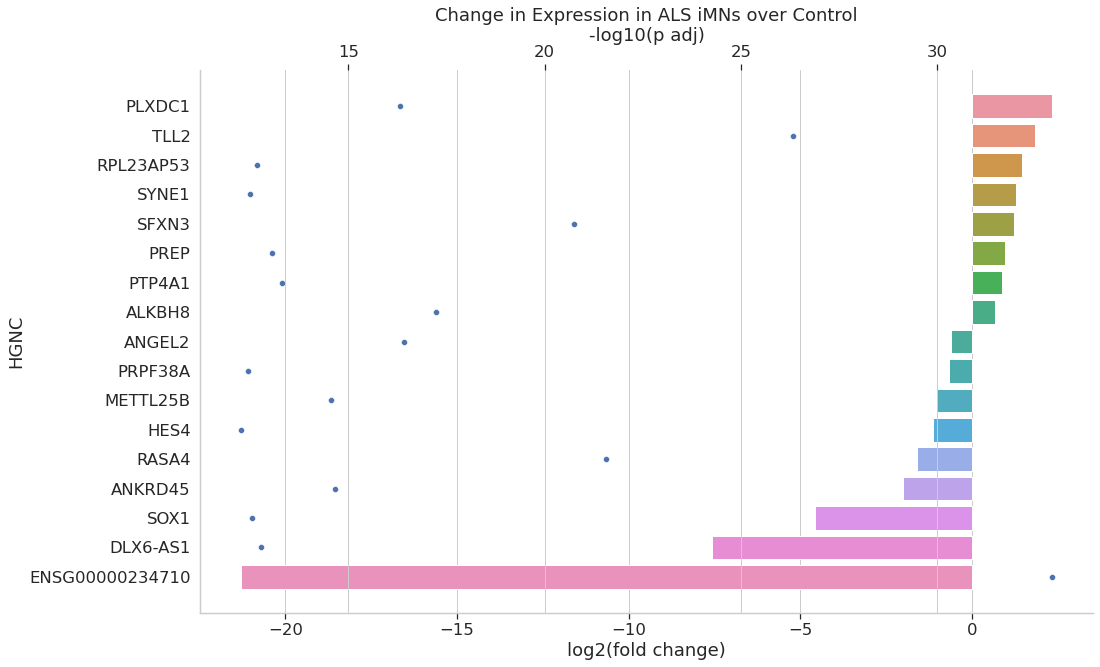

In [13]:
sns.set(style='whitegrid',font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(16,10))
sns.barplot(data=deg_df.reset_index()\
                .sort_values(by='padj',ascending=True)\
                .head(30)\
                .sort_values(by='log2(fold change)',ascending=False),
            y='HGNC',x='log2(fold change)',ax=ax1)
ax2 = ax1.twiny()
ax2.invert_yaxis()
sns.scatterplot(data=deg_df.reset_index()\
                .sort_values(by='padj',ascending=True)\
                .head(30)\
                .sort_values(by='log2(fold change)',ascending=False),
            y='HGNC',x='-log10(p adj)',ax=ax2)
sns.despine()
plt.ylabel('Gene Name')
# plt.xlabel('Log2 Fold Change (ALS/CTR)')
plt.title('Change in Expression in ALS iMNs over Control')
plt.savefig(f"{FIG_DIR}/imn_als_v_ctr_deseq_topgenes.png",bbox_inches='tight')